In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, median_absolute_error

In [143]:
# Laste poll-of-polls data
df = pd.read_csv("../data/v2_data_august.csv", sep=",")

In [144]:
df["Mnd"] = pd.to_datetime(df["Mnd"])

In [145]:
# Sort values and set index
df = df.sort_values("Mnd")
df.set_index("Mnd", inplace=True)

In [146]:
X_elect=df.loc[df.index==pd.to_datetime('2025-09-30')]

In [147]:
X_elect

,Ap,Hoyre,Frp,SV,SP,KrF,Venstre,MDG,Rodt,Andre,...,Rodt_reg_lag3,Rodt_reg_lag6,Andre_reg_lag3,Andre_reg_lag6,ledighet,ledig_trend3,ledig_trend6,styringsrente,styringsrente_trend3,styringsrente_trend6
Mnd,,,,,,,,,,,,,,,,,,,,,
2025-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.25,0.0,-0.041667


In [148]:
df=df.dropna()

In [149]:
df

,Ap,Hoyre,Frp,SV,SP,KrF,Venstre,MDG,Rodt,Andre,...,Rodt_reg_lag3,Rodt_reg_lag6,Andre_reg_lag3,Andre_reg_lag6,ledighet,ledig_trend3,ledig_trend6,styringsrente,styringsrente_trend3,styringsrente_trend6
Mnd,,,,,,,,,,,,,,,,,,,,,
2008-06-30,26.0,17.6,28.9,6.9,5.3,6.1,5.9,0.0,1.8,0.0,...,0.0,0.0,0.0,0.0,2.9,0.067,0.050000,5.54,0.076667,0.048333
2008-07-31,26.9,17.2,30.2,6.6,4.7,6.1,5.4,0.0,1.9,0.0,...,0.0,0.0,0.0,0.0,2.9,0.033,0.050000,5.75,0.083333,0.083333
2008-08-31,26.6,16.2,30.9,6.7,5.2,5.5,6.0,0.0,1.7,0.0,...,0.0,0.0,0.0,0.0,3.0,0.033,0.066667,5.75,0.070000,0.083333
2008-09-30,28.9,15.2,29.9,6.3,5.0,5.7,5.9,0.0,1.5,0.0,...,0.0,0.0,0.0,0.0,3.1,0.067,0.066667,5.75,0.000000,0.073333
2008-10-31,30.6,16.1,26.7,7.3,5.3,5.6,5.5,0.0,1.2,0.0,...,0.0,0.0,0.0,0.0,3.1,0.033,0.050000,5.45,-0.100000,-0.008333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-30,28.1,19.8,20.0,6.3,6.7,3.3,3.9,3.1,4.8,3.9,...,0.0,0.0,0.0,0.0,4.0,-0.033,-0.016667,4.50,0.000000,0.000000
2025-05-31,28.5,18.7,20.6,7.0,5.7,3.6,4.1,2.7,5.3,3.8,...,0.0,0.0,0.0,0.0,4.0,0.000,-0.016667,4.50,0.000000,0.000000
2025-06-30,28.3,16.2,21.0,6.9,5.6,3.7,4.5,3.0,6.2,4.5,...,0.0,0.0,0.0,0.0,4.0,0.000,-0.016667,4.50,0.000000,0.000000


In [150]:
parties=['Ap', 'Hoyre', 'Frp', 'SV', 'SP', 'KrF', 'Venstre', 'MDG','Rodt', 'Andre']
predictions=[]

In [151]:
external= ['Ap_skandale_lag6', 'Hoyre_skandale_lag6', 'Frp_skandale_lag6',
       'SV_skandale_lag6', 'SP_skandale_lag6', 'KrF_skandale_lag6',
        'Rodt_skandale_lag6',
        'Ap_reg_lag6',
        'Hoyre_reg_lag6', 
        'Frp_reg_lag6','SV_reg_lag6', 
        'SP_reg_lag6','KrF_reg_lag6',
        'Venstre_reg_lag6', 
       'ledighet', 'ledig_trend3', 'ledig_trend6', 'styringsrente',
       'styringsrente_trend3', 'styringsrente_trend6']

In [152]:
X_elect_p=X_elect[external]

In [153]:
X_elect_p

,Ap_skandale_lag6,Hoyre_skandale_lag6,Frp_skandale_lag6,SV_skandale_lag6,SP_skandale_lag6,KrF_skandale_lag6,Rodt_skandale_lag6,Ap_reg_lag6,Hoyre_reg_lag6,Frp_reg_lag6,SV_reg_lag6,SP_reg_lag6,KrF_reg_lag6,Venstre_reg_lag6,ledighet,ledig_trend3,ledig_trend6,styringsrente,styringsrente_trend3,styringsrente_trend6
Mnd,,,,,,,,,,,,,,,,,,,,
2025-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.25,0.0,-0.041667


In [154]:
df[external]

,Ap_skandale_lag6,Hoyre_skandale_lag6,Frp_skandale_lag6,SV_skandale_lag6,SP_skandale_lag6,KrF_skandale_lag6,Rodt_skandale_lag6,Ap_reg_lag6,Hoyre_reg_lag6,Frp_reg_lag6,SV_reg_lag6,SP_reg_lag6,KrF_reg_lag6,Venstre_reg_lag6,ledighet,ledig_trend3,ledig_trend6,styringsrente,styringsrente_trend3,styringsrente_trend6
Mnd,,,,,,,,,,,,,,,,,,,,
2008-06-30,1.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0,0.0,6.0,6.0,0.0,0.0,2.9,0.067,0.050000,5.54,0.076667,0.048333
2008-07-31,1.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0,0.0,6.0,6.0,0.0,0.0,2.9,0.033,0.050000,5.75,0.083333,0.083333
2008-08-31,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0,0.0,6.0,6.0,0.0,0.0,3.0,0.033,0.066667,5.75,0.070000,0.083333
2008-09-30,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0,0.0,6.0,6.0,0.0,0.0,3.1,0.067,0.066667,5.75,0.000000,0.073333
2008-10-31,1.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0,0.0,6.0,6.0,0.0,0.0,3.1,0.033,0.050000,5.45,-0.100000,-0.008333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,-0.033,-0.016667,4.50,0.000000,0.000000
2025-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.000,-0.016667,4.50,0.000000,0.000000
2025-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.000,-0.016667,4.50,0.000000,0.000000


In [163]:
cutoff=pd.to_datetime('2025-06-30')
election_pred=[]
pred=[]
for party in parties:
    y=df[[party]].loc[df.index <= cutoff]  
    X=df[external].loc[df.index <= cutoff]
    X_future=df[external].loc[df.index > cutoff]  
    y_future=df[[party]].loc[df.index > cutoff]  
    pipeline = Pipeline([
    ("scale", StandardScaler()),
    ("feature_selection", SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=69), threshold="median")),
    ("regressor", RandomForestRegressor(n_estimators=1000, random_state=42))
    #("regressor", LinearRegression())
    ])
    #pipeline=SVR()
    
    pipeline.fit(X, y.values.ravel())
    hist=pipeline.predict(X)
    fut = pipeline.predict(X_future)
    combined_preds = np.concatenate([hist, fut])
    r2 = r2_score(y_future, fut)
    print({
    'party': party,
    'r2_score': r2
    })
    pred.append(combined_preds)
    

{'party': 'Ap', 'r2_score': -42.21482803727835}
{'party': 'Hoyre', 'r2_score': -450.57373027547897}
{'party': 'Frp', 'r2_score': -5166.581359324975}
{'party': 'SV', 'r2_score': -0.2823499082564427}
{'party': 'SP', 'r2_score': -89.26691237256155}
{'party': 'KrF', 'r2_score': -0.5743350152926592}
{'party': 'Venstre', 'r2_score': -26.73435388888899}
{'party': 'MDG', 'r2_score': -19.50908382730136}
{'party': 'Rodt', 'r2_score': -72.84148972056774}
{'party': 'Andre', 'r2_score': -2.6175370160386207}


In [156]:
fut

array([3.23452562, 2.97322158, 2.73115329, 2.7392243 , 2.73900814])

In [157]:
y_future

,Andre
Mnd,
2025-04-30,3.9
2025-05-31,3.8
2025-06-30,4.5
2025-07-31,4.1
2025-08-31,5.0


In [158]:
pred_df = pd.DataFrame(
    np.column_stack(pred),
    columns=parties,
    index=df.index  # optional: align with original df index
)

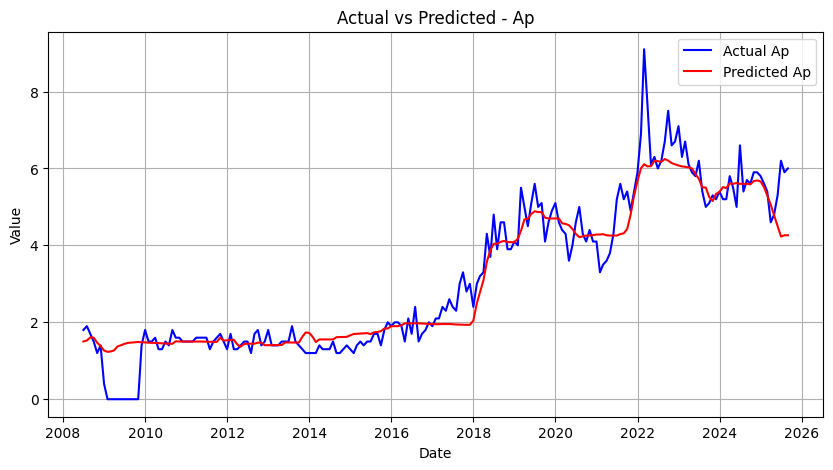

In [159]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.plot(df.index, df['Rodt'], label='Actual Ap', color='blue')
plt.plot(pred_df.index, pred_df['Rodt'], label='Predicted Ap', color='red')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted - Ap')
plt.legend()
plt.grid(True)
plt.show()